<a href="https://colab.research.google.com/github/Aryanaut/eutro-reverso/blob/main/workingWithMultispectralDataTiff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ukai-dam-naturalcolor-cropped.png to ukai-dam-naturalcolor-cropped.png


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])
  ))

User uploaded file "ukai-dam-naturalcolor-cropped.png" with length 33932753 bytes


In [ ]:
from osgeo import gdal
import numpy as np
import sys
from PIL import Image 

In [ ]:
file = "LC08_L1TP_148045_20211125_20211201_01_T1.tif"
filetif = gdal.Open(file)

In [ ]:
for bi in range(filetif.RasterCount):
  band = filetif.GetRasterBand(bi+1)
  ar = band.ReadAsArray()
  print('Band %d has type %s'%(bi+1, ar.dtype))
  raw = ar.tostring()

Band 1 has type uint8
Band 2 has type uint8
Band 3 has type uint8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  """


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
def plotBand(ds, num, color):
  myarray1 = np.array(ds.GetRasterBand(num).ReadAsArray())
  pyplot.imshow(myarray1, cmap=color)
  pyplot.show()
  return 

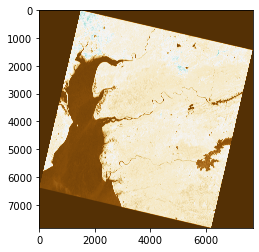

In [ ]:
fig = plotBand(filetif, 1, 'BrBG')

In [ ]:
!pip install spectral
from spectral import *

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
img = cv2.imread("ukai-dam-naturalcolor-cropped.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
_, thr = cv2.threshold(gray, 75, 225, cv2.THRESH_BINARY)
thr = cv2.resize(thr, None, fx=0.1, fy=0.1)

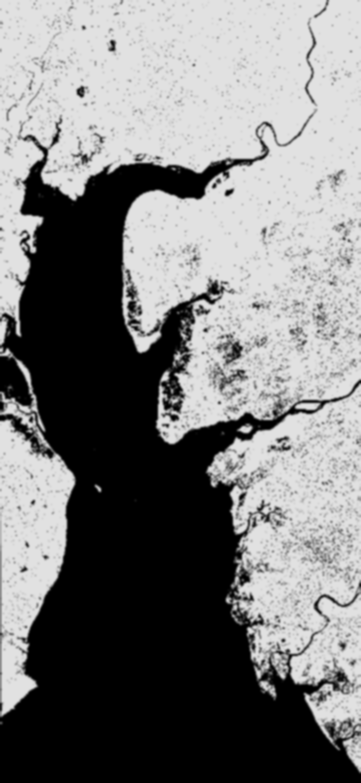

In [ ]:
thr = cv2.GaussianBlur(thr,(5,5),0)
cv2_imshow(thr)

(783, 300, 3)


True

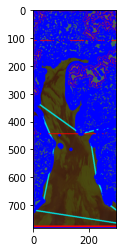

In [84]:
cnt, h = cv2.findContours(thr, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
cv2.drawContours(cropped, cnt, -1, color=(0, 0, 255), thickness=3)

maxCnt = max(cnt, key=cv2.contourArea)

hull = []
for i in range (len(cnt)):
  hull.append(cv2.convexHull(cnt[i], False))

# cv2.drawContours(cropped, hull, -1, color=(0, 225, 225), thickness=3)
# cv2_imshow(cropped)
pyplot.imshow(cropped)
print(cropped.shape)

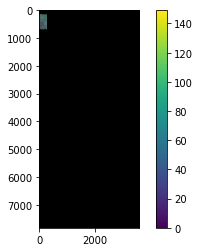

In [ ]:
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (0, 150, 300, 550)
mask = np.zeros(img.shape[:2],np.uint8)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img)
plt.colorbar()
plt.show()